# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

## Introduction

This notebook contains the solution for Task 1 of the Quantium Virtual Internship. 
We will analyze retail data using Python, perform exploratory data analysis, and generate insights.

In [2]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

%matplotlib inline


In [3]:
# Set display options for better readability

# Show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Show the entire content in each column without truncation
pd.set_option('display.max_colwidth', None)


### importing transaction data

In [4]:
# Importing dataset

file_path = r"C:\Users\Rohith R\Desktop\forage\quantium"

# Read the transaction data into a pandas dataframe

transaction_data = pd.read_excel(file_path+ r"\QVI_transaction_data.xlsx")

### Exploratory Data Analysis (EDA)
Before performing any analysis, we need to understand the dataset.
We'll start by previewing the data and checking its structure.

In [5]:
# Preview the first few rows of the dataset 
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
# Display information about data types and missing values
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
# Generate summary statistics for numeric columns 
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


### Data Cleaning and Preprocessing
Convert DATE Column to Date Format.

We can see that the DATE column is currently in an integer format.
A quick search online tells us that CSV and Excel integer dates begin on December 30, 1899.
We will convert this column into the proper date format.

In [8]:
# Convert DATE column from integer to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'],origin = '1899-12-30',unit='D')

In [9]:
# Verify the changes
transaction_data.info()
transaction_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Cleaning Product Names
We will perform some text preprocessing on the `PROD_NAME` column to remove inconsistencies and ensure proper categorization of products.

In [10]:
# Create a copy of the dataset to preserve the original
transaction_cleaned_data = transaction_data.copy()

In [11]:
# Remove leading and trailing spaces from the PROD_NAME column
transaction_cleaned_data['PROD_NAME'] = transaction_cleaned_data['PROD_NAME'].str.strip()

In [12]:
# Remove weight indicators from product names
transaction_cleaned_data['CLEAN_NAME'] = transaction_cleaned_data['PROD_NAME'].str.replace(r'g$', '', regex=True)

# Removing special characters and digits from product name
transaction_cleaned_data['CLEAN_NAME'] = transaction_cleaned_data['CLEAN_NAME'].str.replace(r'[\d\W]+', ' ', regex=True).str.lower()


### Checking for Incorrect Product Entries
To ensure that our dataset contains only potato chips, we will analyze the most frequently occurring words in the product names.

In [13]:
#Let's look at the most common words by counting the number of times a word appears
word_list = transaction_cleaned_data['CLEAN_NAME'].str.split().explode()
word_list.value_counts()

CLEAN_NAME
chips              49770
kettle             41288
smiths             28860
salt               27976
cheese             27890
pringles           25102
doritos            24962
crinkle            23960
corn               22063
original           21560
cut                20754
chip               18645
chicken            18577
salsa              18094
cream              16926
chilli             15390
sea                14145
thins              14075
sour               13882
crisps             12607
vinegar            12402
rrd                11894
sweet              11060
infuzions          11057
supreme            10963
chives             10951
ww                 10320
popd                9693
cobs                9693
tortilla            9580
tostitos            9471
twisties            9454
bbq                 9434
sensations          9429
lime                9347
old                 9324
paso                9324
dip                 9324
el                  9324
g             

### Removing Non-Chip Products
From the previous step, we observed that 'salsa' appears in the dataset, which is not a potato chip product. We will remove such entries.

In [14]:
# Remove products containing 'salsa'
transaction_cleaned_data = transaction_cleaned_data[~transaction_cleaned_data['CLEAN_NAME'].str.contains(r'\bsalsa\b', case=False, na=False)]

In [15]:
# Confirm the changes by re-examining word frequencies
word_list1= transaction_cleaned_data['CLEAN_NAME'].str.split().explode()
word_list1.value_counts()

CLEAN_NAME
chips              49770
kettle             41288
salt               27976
cheese             27890
smiths             27390
pringles           25102
crinkle            22490
corn               22063
doritos            22041
original           21560
cut                19284
chip               18645
chicken            18577
cream              16926
chilli             15390
sea                14145
thins              14075
sour               13882
crisps             12607
vinegar            12402
rrd                11894
sweet              11060
infuzions          11057
supreme            10963
chives             10951
ww                 10320
cobs                9693
popd                9693
tortilla            9580
tostitos            9471
twisties            9454
bbq                 9434
sensations          9429
lime                9347
g                   9321
swt                 7987
thinly              7507
tyrrells            6442
and                 6373
tangy         

### Final Inspection of Cleaned Dataset
After performing the above cleaning steps, we will inspect the dataset once again.

In [16]:
# Display dataset information
transaction_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   CLEAN_NAME      246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.8+ MB


In [17]:
# Generate summary statistics
transaction_cleaned_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


### Examining Outliers
We will analyze transaction quantities to detect anomalies.

In [18]:
# Sort by product quantity to identify potential outliers
transaction_cleaned_data.sort_values(by='PROD_QTY', ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEAN_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme
32226,2018-08-19,62,62057,58117,51,Doritos Mexicana 170g,5,22.0,doritos mexicana
69541,2019-05-16,86,86089,84699,38,Infuzions Mango Chutny Papadums 70g,5,12.0,infuzions mango chutny papadums
238227,2019-05-19,180,180111,181705,53,RRD Sweet Chilli & Sour Cream 165g,5,15.0,rrd sweet chilli sour cream


We observe two transactions where 200 packets of chips were bought in a single transaction.
Let's check if the same customer made these purchases.

In [19]:
# Check for other transactions from the same customer

transaction_cleaned_data[transaction_cleaned_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEAN_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,dorito corn chp supreme


It turns out that this customer has only made these two transactions.
They are likely purchasing chips for commercial purposes rather than regular retail shopping.
We'll remove this customer's transactions from further analysis.

In [20]:
# Remove this customer's transactions
transaction_cleaned_data = transaction_cleaned_data[transaction_cleaned_data['LYLTY_CARD_NBR'] != 226000]

In [21]:
# Re-examine dataset after removing outliers
transaction_cleaned_data.sort_values(by='PROD_QTY', ascending=False).head()
transaction_cleaned_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


### Examining Transactions Over Time
Now, let's look at the number of transaction lines over time to identify any obvious data issues, such as missing date.

##### Count the Number of Transactions by Date
We begin by summarizing the transaction count for each date to check if any dates are missing.

In [22]:
# Counting the number of transactions by date
transaction_by_date = transaction_cleaned_data['DATE'].value_counts()

In [23]:
# Checking the summary of transaction dates
transaction_by_date.shape

(364,)

There's only 364 rows, meaning only 364 dates, which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of the number of transactions over time to find the missing date.

In [24]:
# Create a complete date range
date_range = pd.date_range(start="2018-07-01", end="2019-06-30")

# converting this to a dataframe 
date_df = pd.DataFrame(date_range, columns=["DATE"])

# Merge the existing dataset with the complete date range to fill in missing days
date_df = pd.merge(date_df, transaction_data, on="DATE", how="left")

# Filling the missing values with 0
date_df.fillna(0, inplace=True)

In [25]:
# Recounting after the addition of the missing date
transaction_by_date = date_df['DATE'].value_counts()

# Coverting to a dataframe
transaction_by_date = pd.DataFrame(transaction_by_date).reset_index()

# Renaming columns for clarity
transaction_by_date.columns = ['DATE', 'N']  

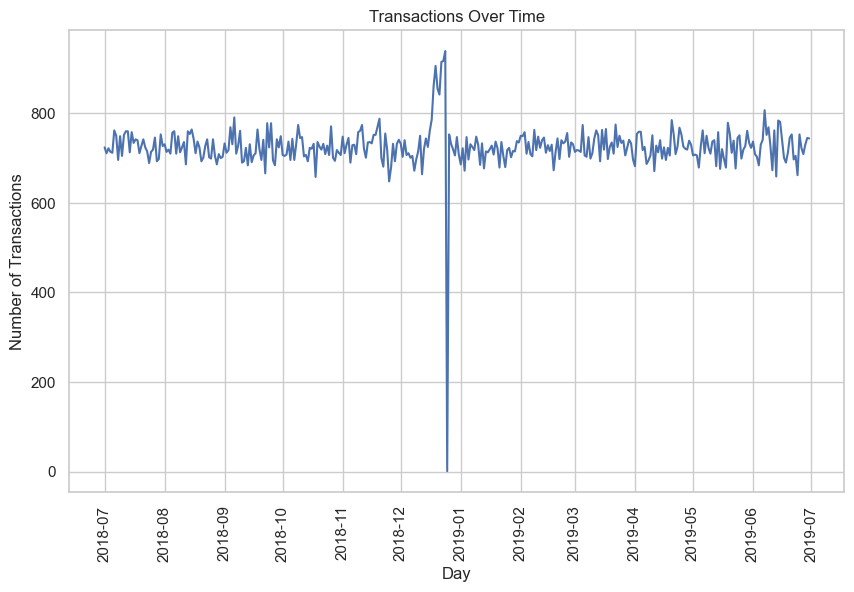

In [26]:
# Set a clean theme similar to theme_bw() in ggplot2
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(10, 6)) 

# Create line plot
sns.lineplot(data=transaction_by_date, x='DATE', y='N')

# Formatting the plot
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")

# Format x-axis to show month-wise breaks and rotate labels
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())  # Monthly breaks

plt.show()

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

#### Filter to December and look at individual days

In [27]:
# Filter the dataset to include only December 2018
dec_transactions = transaction_by_date[transaction_by_date['DATE'].dt.month == 12]

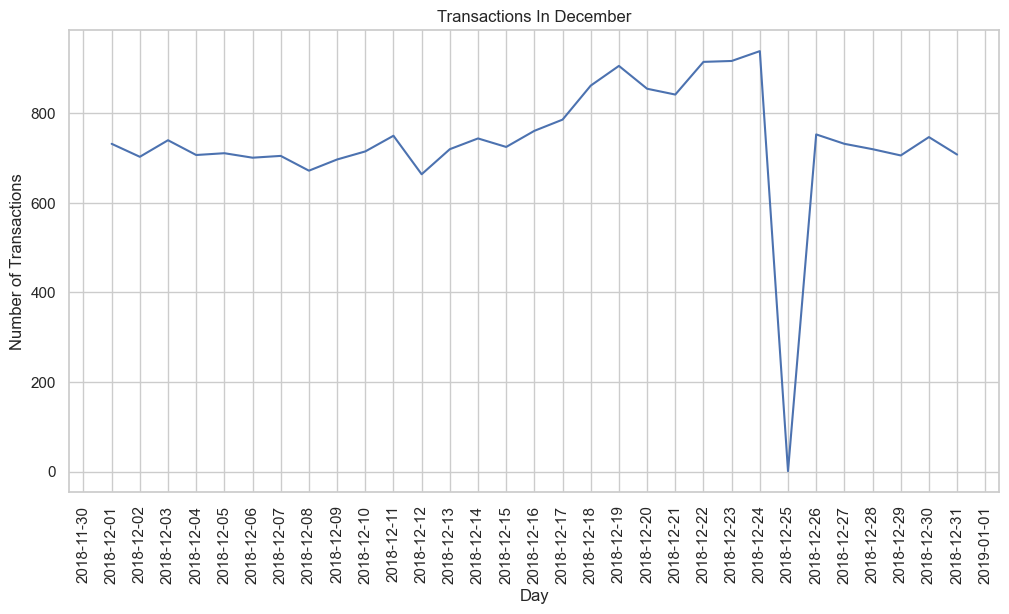

In [28]:
import matplotlib.dates as mdates

# Set figure size
plt.figure(figsize=(12, 6)) 

# Create line plot
sns.lineplot(data=dec_transactions, x='DATE', y='N')

# Formatting the plot
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.title("Transactions In December")

# Format x-axis to show month-wise breaks and rotate labels
plt.xticks(rotation=90)

# Show day-wise ticks
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  

plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas Day itself. This is due to shops being closed on Christmas Day.

#### Pack size
#### We can work this out by taking the digits that are in PROD_NAME

In [29]:
# # Extract pack size from PROD_NAME by taking the last 4 characters (assuming grams are mentioned at the end)
transaction_cleaned_data['product_weight'] = transaction_cleaned_data['PROD_NAME'].str[-4:]

In [30]:
# Ensure consistency by replacing 'G' with 'g'
transaction_cleaned_data['product_weight'] = transaction_cleaned_data['product_weight'].astype(str).apply(lambda x: x.replace('G', 'g'))

# A product ended with 'Salt' instead of its weight. Replacing 'Salt' with '135g'.
transaction_cleaned_data['product_weight'] = transaction_cleaned_data['product_weight'].replace({'Salt': '135g'})

# count the product weight category
pack_size_counts = transaction_cleaned_data['product_weight'].value_counts()

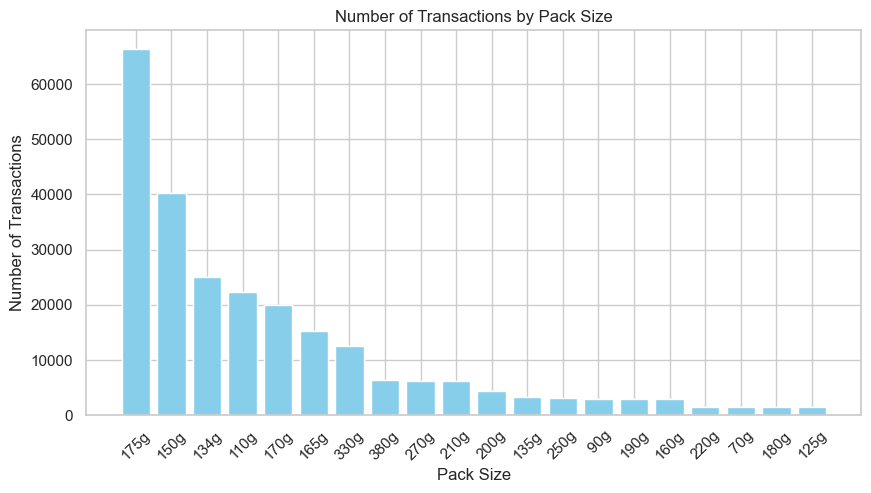

In [31]:
# Plot a bar chart showing the distribution of product weights.
plt.figure(figsize=(10,5))
plt.bar(pack_size_counts.index.astype(str), pack_size_counts.values, color='skyblue')
bars = plt.bar(pack_size_counts.index.astype(str), pack_size_counts.values, color='skyblue')

# Labels & Title
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
plt.xticks(rotation=45)  

# Show the plot
plt.show()

The most common pack sizes are 175g and 150g, indicating a strong consumer preference for these options. Mid-range sizes like 134g, 110g, and 170g also see significant sales, suggesting a well-distributed demand across various pack sizes. Larger packs such as 330g and 380g have comparatively lower sales, possibly due to higher pricing or reduced consumer need for bulk purchases. The least sold pack sizes, including 70g and 180g, indicate minimal demand for very small or non-standard sizes.

#### Extracting and Cleaning Brand Names from Product Data
To identify the brand of each product, we extract the first word from the PROD_NAME column. Since brand names are typically the first word in product descriptions, this method helps isolate them effectively.

In [32]:
#Extracting the first name from the product names
transaction_cleaned_data['brand_names'] = transaction_cleaned_data['PROD_NAME'].str.split().str[0]

Once extracted, we check for any inconsistencies or anomalies in the brand names. This allows us to identify potential issues such as misspellings, abbreviations, or alternative representations of the same brand.

In [33]:
#Checking the distinct brand name from extracted brand name.
transaction_cleaned_data['brand_names'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

We define a list of known valid brand names and manually map any inconsistencies to their correct form. This ensures uniformity in brand representation.

In [34]:
# List of known valid brand names
valid_brands = ['CCs', 'Smiths', 'Kettle', 'Doritos', 'Twisties', 'WW', 'Thins',
                'Cheezels', 'Infuzions', 'Pringles', 'Tyrrells', 'Cobs', 'RRD',
                'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites', 'Burger']

# Standardizing variations
brand_corrections = {'Dorito': 'Doritos', 'Infzns': 'Infuzions', 'GrnWves': 'Grainwaves', 'Snbts': 'Sunbites','Red':'RRD','Smith': 'Smiths'}

# Replace variations
transaction_cleaned_data['brand_names'] = transaction_cleaned_data['brand_names'].replace(brand_corrections)

After making the corrections, we check the dataset again to ensure all brand names are consistent and correctly formatted.

In [35]:
# Checking the dataset after the changes.
transaction_cleaned_data['brand_names'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain', 'Grainwaves', 'Infuzions', 'Kettle', 'NCC',
       'Natural', 'Pringles', 'RRD', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'WW', 'Woolworths'],
      dtype=object)

In [36]:
# checking the whole transaction dataset after all this cleaning.
transaction_cleaned_data.head()
transaction_cleaned_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEAN_NAME,product_weight,brand_names
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,kettle sweet chilli and sour cream,175g,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,tostitos splash of lime,175g,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,doritos mexicana,170g,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,doritos corn chip mexican jalapeno,150g,Doritos
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,tostitos splash of lime,175g,Tostitos


### Exploratory Data Analysis of Customer Data
#### Importing Customer Data

In [37]:
transaction_cleaned_data['product_weight'].value_counts().reset_index()


,product_weight,count
0,175g,66390
1,150g,40203
2,134g,25102
3,110g,22387
4,170g,19983
5,165g,15297
6,330g,12540
7,380g,6416
8,270g,6285
9,210g,6272


In [38]:
# Read the customer data into a pandas dataframe
customer_data = pd.read_csv(file_path+r"\QVI_purchase_behaviour.csv")

#### Examining Customer Data
We begin by inspecting the structure and content of the dataset.

In [39]:
# Display the first few rows of the dataset
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [40]:
# Get an overview of the dataset, including column data types and non-null counts
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [41]:
# Summarize the dataset with descriptive statistics
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [42]:
customer_data.groupby("PREMIUM_CUSTOMER").size().reset_index(name="N").sort_values(by="N", ascending= False)

,PREMIUM_CUSTOMER,N
1,Mainstream,29245
0,Budget,24470
2,Premium,18922


In [43]:
customer_data.groupby("LIFESTAGE").size().reset_index(name="N").sort_values(by="N", ascending= False)

,LIFESTAGE,N
4,RETIREES,14805
3,OLDER SINGLES/COUPLES,14609
6,YOUNG SINGLES/COUPLES,14441
2,OLDER FAMILIES,9780
5,YOUNG FAMILIES,9178
0,MIDAGE SINGLES/COUPLES,7275
1,NEW FAMILIES,2549


#### Merging Transaction Data with Customer Data
To enrich our analysis, we merge the cleaned transaction dataset with the customer dataset using a left join on the LYLTY_CARD_NBR column. This ensures that all transactions are retained while matching customer details where available.

In [44]:
# Perform a left join between transaction data and customer data
data = pd.merge(transaction_cleaned_data, customer_data, how='left', on='LYLTY_CARD_NBR')

#### Validating the Merge
After merging, we check whether the number of rows remains consistent to confirm that no duplicate entries were introduced.

In [45]:
# Display the first few rows of the merged dataset
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEAN_NAME,product_weight,brand_names,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chip compny seasalt,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs nacho cheese,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths crinkle cut chips chicken,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths chip thinly s cream onion,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle tortilla chpshny jlpno chili,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [46]:
# Check the row count of the merged dataset
data.shape

(246740, 13)

In [47]:
# Verify that the transaction dataset's row count remains unchanged
transaction_cleaned_data.shape

(246740, 11)

Since the number of rows in data matches transaction_cleaned_data, we can confirm that the merge did not introduce duplicate rows.

In [48]:
# Get an overview of the dataset, including column data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   CLEAN_NAME        246740 non-null  object        
 9   product_weight    246740 non-null  object        
 10  brand_names       246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memor

In [49]:
# Checking for any null values introduced during the join process.
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
CLEAN_NAME          0
product_weight      0
brand_names         0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Since there are no null values, we can confirm that all customers in the transaction dataset have been accounted for in the customer dataset.

#### Saving the Merged Dataset
Finally, we save the cleaned dataset as a CSV file for further analysis in the next task.

In [50]:
# Save dataset as a CSV file for future use
data.to_csv(file_path + "QVI_data.csv", index=False)

## Data analysis on customer segments
Now that the data is ready for analysis, we can define some key metrics of interest to the client:

* Who spends the most on chips (total sales)? We describe customers by lifestage and how premium their general purchasing behavior is.
* How many customers are in each segment?
* How many chips are bought per customer by segment?
* What's the average chip price by customer segment?

#### 1. Total sales by LIFESTAGE and PREMIUM_CUSTOMER

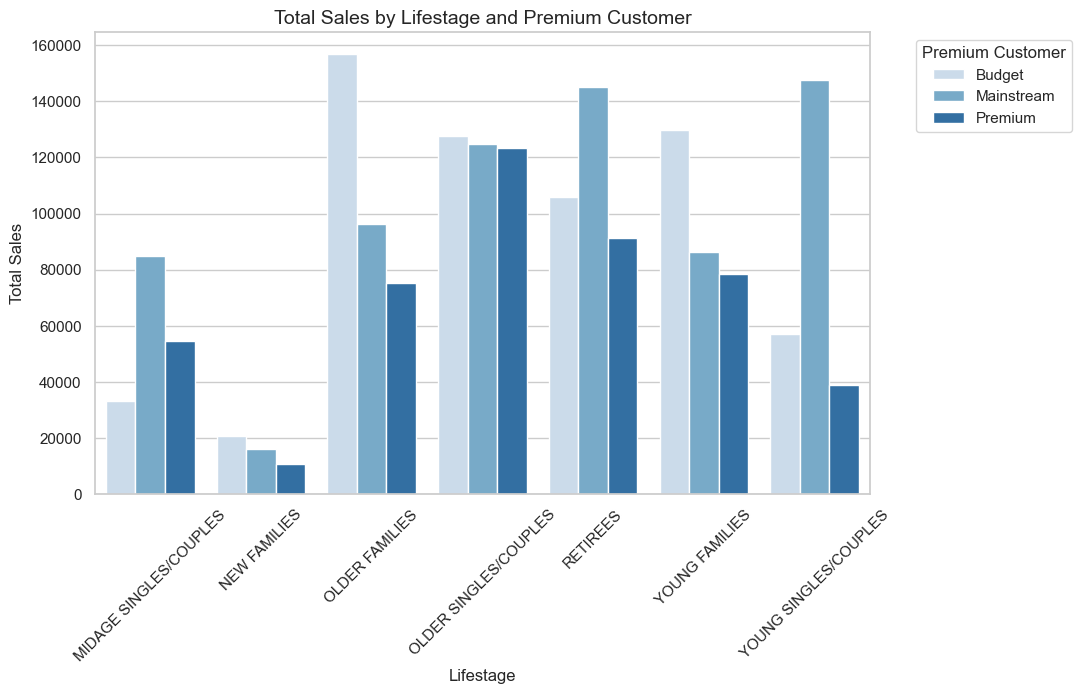

In [51]:
# Grouping sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_summary = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_summary, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='Blues')

# Formatting the plot
plt.xlabel("Lifestage", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Lifestage and Premium Customer", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Premium Customer",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Findings
Sales are primarily driven by the following customer segments:

* Budget - Older Families
* Mainstream - Young Singles/Couples
* Mainstream - Retirees

These segments contribute the most to chip sales, suggesting a strong preference for chips among these groups. Further analysis may explore their purchasing behaviors in more detail.

#### 2. Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

To determine whether higher sales are due to more customers purchasing chips, we analyze the number of customers in each segment.

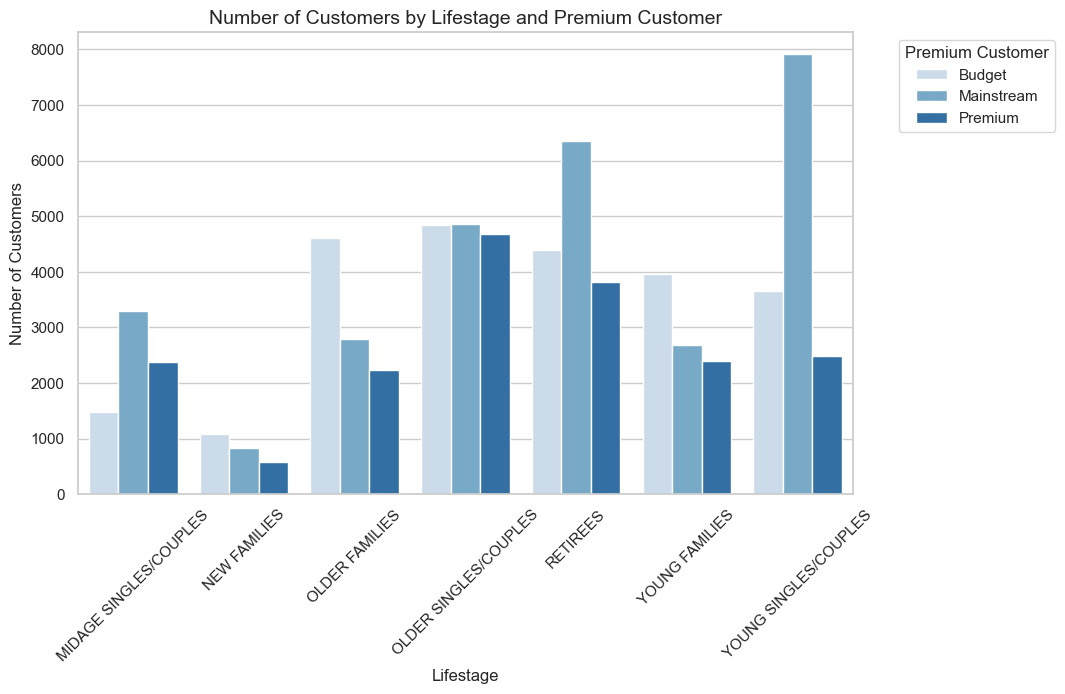

In [52]:
# Grouping sales by LIFESTAGE and PREMIUM_CUSTOMER
number_of_customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=number_of_customers, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', palette='Blues')

# Formatting the plot
plt.xlabel("Lifestage", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Number of Customers by Lifestage and Premium Customer", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Premium Customer",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Findings
* The analysis shows that Mainstream - Young Singles/Couples and Mainstream - Retirees have the highest number of customers purchasing chips. This contributes to increased sales in these segments.

* However, for the Budget - Older Families segment, higher sales are not primarily driven by a larger customer base. This suggests that other factors, such as higher purchase frequency or larger quantities per transaction, may be influencing sales.


#### 3. Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
To examine whether higher sales are driven by more units of chips bought per customer, we calculate the average number of units purchased per customer across different segments.

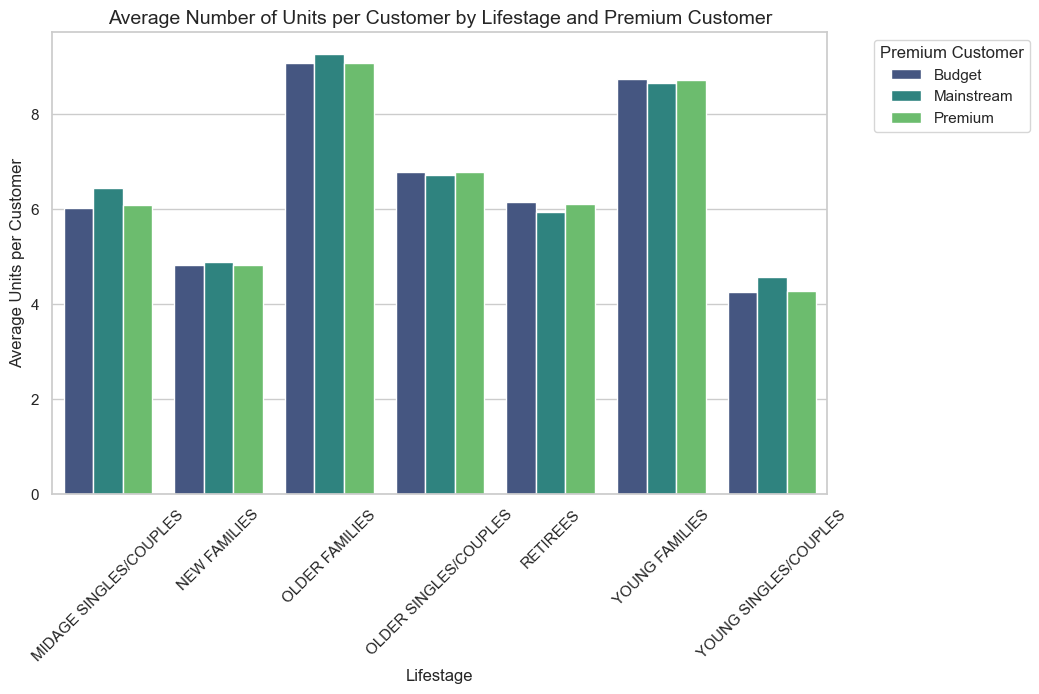

In [53]:
# Calculating average units per customer
units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
units_per_customer = units_per_customer.reset_index().rename(columns={0: 'AVG_UNITS_PER_CUSTOMER'})

# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=units_per_customer, x='LIFESTAGE', y='AVG_UNITS_PER_CUSTOMER', hue='PREMIUM_CUSTOMER', palette='viridis')

# Formatting the plot
plt.xlabel("Lifestage", fontsize=12)
plt.ylabel("Average Units per Customer", fontsize=12)
plt.title("Average Number of Units per Customer by Lifestage and Premium Customer", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Premium Customer",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Findings 
The analysis indicates that Older Families and Young Families purchase more chips per customer compared to other segments. This suggests that purchase volume per customer is a key driver of total sales for these segments.

#### 4.Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
Now that we have examined the number of units bought per customer segment, let’s investigate the average price per unit sold (average sale price) for each LIFESTAGE and PREMIUM_CUSTOMER segment.

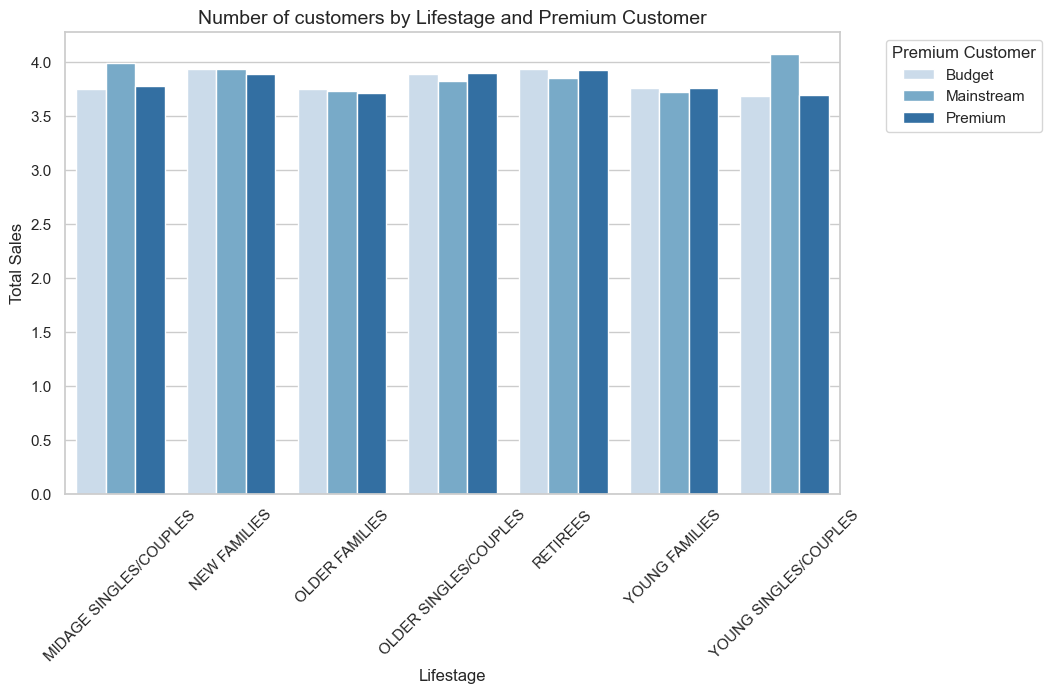

In [54]:
# Grouping sales by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = (data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / 
                      data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()).reset_index()

avg_price_per_unit.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_PRICE_PER_UNIT']
# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', palette='Blues')

# Formatting the plot
plt.xlabel("Lifestage", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Number of customers by Lifestage and Premium Customer", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Premium Customer",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Findings 
* Mainstream midage and young singles/couples tend to pay more per packet of chips compared to budget and premium shoppers.
* Premium customers may prefer healthier snacks and only buy chips for entertainment.
* There are fewer premium midage and young singles/couples purchasing chips compared to their mainstream counterparts.

## **5. Independent T-Test: Comparing Mainstream vs. Budget/Premium (Midage & Young Singles/Couples)**  

### **Objective**  
To determine whether the **difference in the average price per unit** between **mainstream and budget/premium customers** for **midage and young singles/couples** is **statistically significant**.  

### **Hypothesis Formulation**  

- **Null Hypothesis (H₀):** There is no significant difference in the average price per unit between mainstream and budget/premium customers for midage and young singles/couples.  
- **Alternative Hypothesis (H₁):** The average price per unit for mainstream midage and young singles/couples is **significantly different** from budget/premium midage and young singles/couples.  

### **Methodology**  
We will perform an **independent t-test** to compare the mean **price per unit** for mainstream vs. budget/premium customers. The test will use **Welch’s t-test** (assuming unequal variance).  

### **Interpretation**  
If the p-value is **less than 0.05**, we reject the null hypothesis and conclude that mainstream customers **pay significantly more per unit** compared to budget/premium customers in these life stages.


In [55]:
import pandas as pd
from scipy import stats

# Calculate price per unit
data["price"] = data["TOT_SALES"] / data["PROD_QTY"]

# Filter data for Mainstream customers in both age groups
mainstream_price = data[
    (data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
    (data["PREMIUM_CUSTOMER"] == "Mainstream")
]["price"]

# Filter data for non-Mainstream customers in both age groups (Budget and Premium)
non_mainstream_price = data[
    (data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
    (data["PREMIUM_CUSTOMER"] != "Mainstream")
]["price"]

# Perform an independent t-test (Welch's t-test)
t_stat, p_value = stats.ttest_ind(mainstream_price, non_mainstream_price, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 37.6243885962295, P-value: 6.967354233018139e-306


### **Results**  
- **T-statistic:** 37.6244  
- **P-value:** 6.97e-306  
 
Since the p-value is **extremely small (6.97e-306)**, which is far below the significance threshold of **0.05**, we reject the null hypothesis. This indicates that the average price per unit for **mainstream customers in the midage and young singles/couples categories** is **significantly higher** than that of budget or premium customers in the same life stages.  

#### 6. Deep dive into specific customer segments for insights
Analyzing Brand and Pack Size Preferences for Mainstream - Young Singles/Couples

In [56]:
# We have found quite a few interesting insights that we can dive deeper into.
# Filter data for 'Mainstream - Young Singles/Couples'
mainstream_young_singles = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                                (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

In [57]:
# Group by BRAND and calculate total sales
brand_sales = mainstream_young_singles.groupby('brand_names')['TOT_SALES'].sum().reset_index()

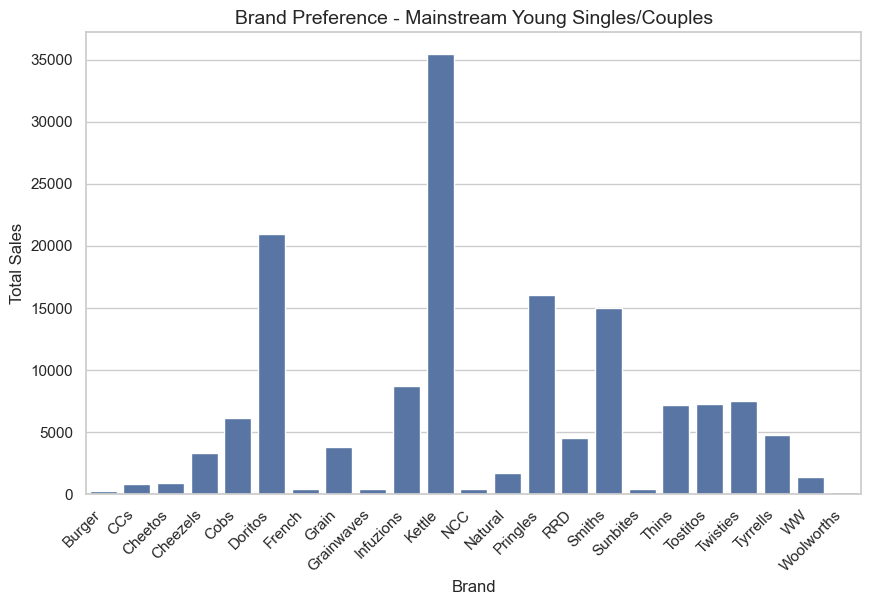

In [58]:
# Plot the brand preferences
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_sales, x='brand_names', y='TOT_SALES')

# Formatting the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Brand Preference - Mainstream Young Singles/Couples", fontsize=14)
plt.show()

#### Findings 
Mainstream - Young Singles/Couples prefer Kettle, Doritos, and Pringles, which have the highest total sales. Smiths, Infuzions, Thins, and Tostitos are moderately popular, while brands like Burger, CCs, and Woolworths have low sales. Marketing and stocking efforts should focus on top brands, with potential promotions for mid-tier brands to boost sales.

#### 7. Pack Size Preferences
We want to determine which pack sizes are most popular among Mainstream - Young Singles/Couples to optimize product offerings and marketing strategies.

In [59]:
# Group by product weight and calculate total sales
pack_size_sales = mainstream_young_singles.groupby('product_weight')['TOT_SALES'].sum().reset_index()

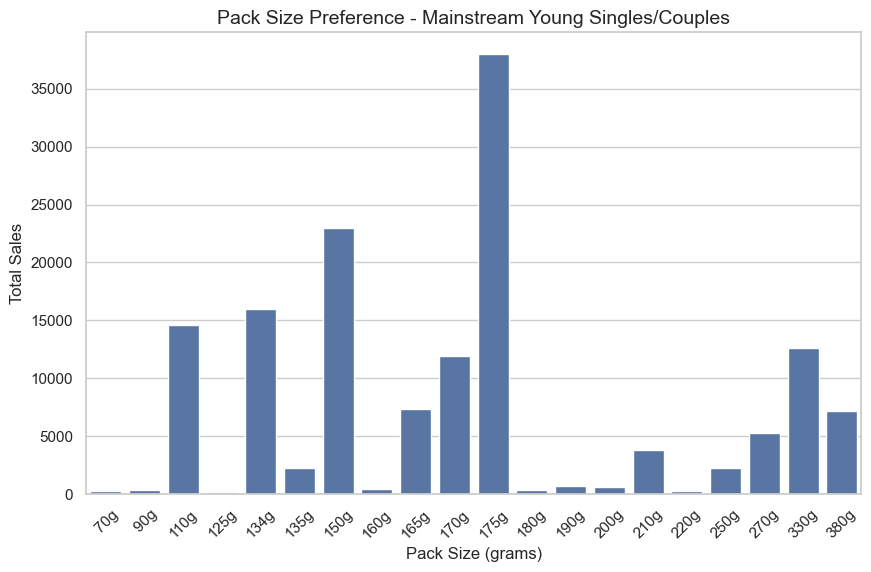

In [60]:
# Plot the weight preferences
plt.figure(figsize=(10, 6))
sns.barplot(data=pack_size_sales, x='product_weight', y='TOT_SALES')

# Formatting the plot
plt.xlabel("Pack Size (grams)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Pack Size Preference - Mainstream Young Singles/Couples", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Findings 
Mainstream - Young Singles/Couples prefer 175g, 150g, and 110g pack sizes, as they have the highest total sales. 134g, 170g, and 330g packs are also popular, while smaller sizes like 70g, 90g, and 125g have low sales. Focusing on the most preferred pack sizes while optimizing mid-tier options could enhance sales performance.

#### Conclusion
The analysis provides valuable insights into the Mainstream - Young Singles/Couples segment:
* Brand Strategy: Focus on Kettle, Doritos, and Pringles, while boosting mid-tier brands.
* Pack Size Strategy: Prioritize 175g, 150g, and 110g packs in marketing efforts.

#### 8. Preferred Pack Size Compared to the Rest of the Population
To understand whether Mainstream - Young Singles/Couples prefer larger packs of chips compared to other customer segments, we will:

In [61]:
mainstream_pack_size = mainstream_young_singles.groupby('product_weight')['TOT_SALES'].sum()
mainstream_pack_size_percentage = (mainstream_pack_size / mainstream_pack_size.sum()) * 100

In [62]:
rest_population = data[~((data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                         (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES'])))]

rest_pack_size = rest_population.groupby('product_weight')['TOT_SALES'].sum()
rest_pack_size_percentage = (rest_pack_size / rest_pack_size.sum()) * 100

<Figure size 1000x600 with 0 Axes>

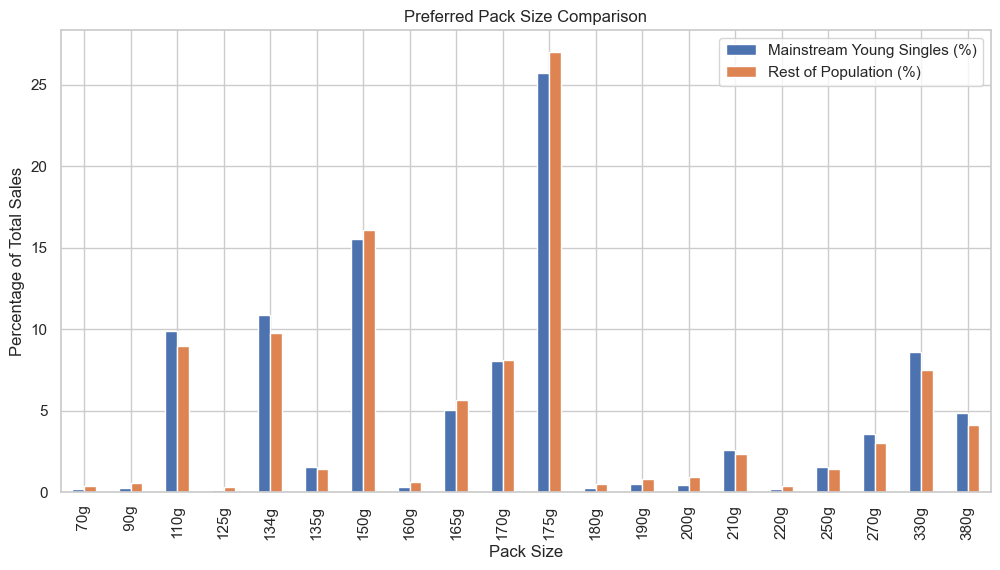

In [63]:
import matplotlib.pyplot as plt

# Combine data for easy comparison
comparison_df = pd.DataFrame({
    'Mainstream Young Singles (%)': mainstream_pack_size_percentage,
    'Rest of Population (%)': rest_pack_size_percentage
}).dropna()

# Plot bar chart
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Preferred Pack Size Comparison')
plt.ylabel('Percentage of Total Sales')
plt.xlabel('Pack Size')
plt.legend()
plt.show()


#### Findings
* 175g is the most popular pack size, making up 26.99% of total sales.
* 150g (16.09%) and 134g (9.75%) are also widely preferred.
* Mid-range pack sizes (165g, 170g, and 110g) contribute a moderate share to sales.
* Smaller pack sizes (70g, 90g, and 125g) have lower demand, suggesting they are less appealing for individual or group consumption.
* Larger packs (330g and 380g) are less popular, but they still hold a notable market share, possibly for social gatherings or families.

In [64]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEAN_NAME,product_weight,brand_names,LIFESTAGE,PREMIUM_CUSTOMER,price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chip compny seasalt,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs nacho cheese,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths crinkle cut chips chicken,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths chip thinly s cream onion,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle tortilla chpshny jlpno chili,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [65]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEAN_NAME,product_weight,brand_names,LIFESTAGE,PREMIUM_CUSTOMER,price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chip compny seasalt,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs nacho cheese,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths crinkle cut chips chicken,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths chip thinly s cream onion,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle tortilla chpshny jlpno chili,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [66]:
data.groupby(by='PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,631406.85
1,Mainstream,700865.40
2,Premium,472905.45
